Saving spam.csv to spam (1).csv

🔎 Model: Naive Bayes
✅ Accuracy: 0.9668161434977578
📊 Confusion Matrix:
 [[965   0]
 [ 37 113]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


🔎 Model: Logistic Regression
✅ Accuracy: 0.9524663677130045
📊 Confusion Matrix:
 [[962   3]
 [ 50 100]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


🔎 Model: SVM
✅ Accuracy: 0.97847533632287
📊 Confusion Matri

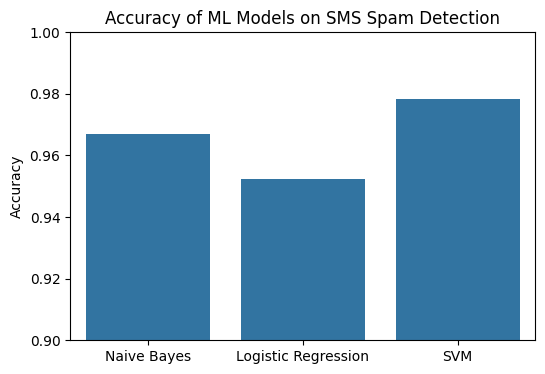

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Upload dataset if using Colab
try:
    from google.colab import files
    uploaded = files.upload()
except:
    print("Local system detected. Ensure 'spam.csv' is in the working directory.")

# Step 3: Load and Preprocess Data
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

X = df['message']
y = df['label_num']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n🔎 Model: {name}")
    print("✅ Accuracy:", acc)
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Predict a Custom Message
def predict_message(msg, model_choice="Naive Bayes"):
    model = models[model_choice]
    vec = vectorizer.transform([msg])
    pred = model.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

# Example
print("\n📥 Prediction Example:")
print("Message: 'Congratulations, you won!' =>", predict_message("Congratulations, you won!", model_choice="SVM"))
print("Message: 'Can we reschedule our meeting?' =>", predict_message("Can we reschedule our meeting?", model_choice="Logistic Regression"))

# Step 8: Plot Accuracy of All Models
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy of ML Models on SMS Spam Detection")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()
